In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import gdown
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.utils.class_weight import compute_class_weight
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [256]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Fifa 23 Players Data.csv')

In [258]:
df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     18539 non-null  object
 1   Full Name                    18539 non-null  object
 2   Overall                      18539 non-null  int64 
 3   Potential                    18539 non-null  int64 
 4   Value(in Euro)               18539 non-null  int64 
 5   Positions Played             18539 non-null  object
 6   Best Position                18539 non-null  object
 7   Nationality                  18539 non-null  object
 8   Image Link                   18539 non-null  object
 9   Age                          18539 non-null  int64 
 10  Height(in cm)                18539 non-null  int64 
 11  Weight(in kg)                18539 non-null  int64 
 12  TotalStats                   18539 non-null  int64 
 13  BaseStats                    18

In [260]:
df.shape

(18539, 89)

In [261]:
df.describe()

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
count,18539.000000,18539.000000,1.853900e+04,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,1.853900e+04,...,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000
mean,65.852042,71.016668,2.875461e+06,25.240412,181.550839,75.173904,1602.114569,357.946221,8824.537462,5.081688e+06,...,58.451319,57.374076,58.451319,56.281569,55.928583,56.281569,55.650251,54.528184,55.650251,23.257134
std,6.788353,6.192866,7.635129e+06,4.718163,6.858097,7.013593,273.160237,39.628259,19460.531154,1.467203e+07,...,13.987122,13.171194,13.987122,13.903836,13.872190,13.903836,14.159466,14.743929,14.159466,15.108925
min,47.000000,48.000000,0.000000e+00,16.000000,155.000000,49.000000,759.000000,224.000000,0.000000,0.000000e+00,...,18.000000,18.000000,18.000000,17.000000,19.000000,17.000000,17.000000,18.000000,17.000000,10.000000
25%,62.000000,67.000000,4.750000e+05,21.000000,177.000000,70.000000,1470.000000,331.000000,1000.000000,6.650000e+05,...,54.000000,53.000000,54.000000,51.000000,48.000000,51.000000,49.000000,45.000000,49.000000,17.000000
50%,66.000000,71.000000,1.000000e+06,25.000000,182.000000,75.000000,1640.000000,358.000000,3000.000000,1.500000e+06,...,62.000000,60.000000,62.000000,59.000000,59.000000,59.000000,59.000000,58.000000,59.000000,18.000000
75%,70.000000,75.000000,2.000000e+06,29.000000,186.000000,80.000000,1786.000000,385.000000,8000.000000,3.400000e+06,...,67.000000,66.000000,67.000000,66.000000,66.000000,66.000000,65.000000,66.000000,65.000000,20.000000
max,91.000000,95.000000,1.905000e+08,44.000000,206.000000,105.000000,2312.000000,502.000000,450000.000000,3.667000e+08,...,92.000000,91.000000,92.000000,88.000000,89.000000,88.000000,87.000000,90.000000,87.000000,90.000000


In [262]:
df.isnull().values.any()

False

In [263]:
 df.columns.values

array(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link',
       'Age', 'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total',
       'Passing Total', 'Dribbling Total', 'Defending Total',
       'Physicality Total', 'Crossing', 'Finishing', 'Heading Accuracy',
       'Short Passing', 'Volleys', 'Dribbling', 'Curve',
       'Freekick Accuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Shot Powe

In [264]:
new_df = df[df.Overall>=85]

In [265]:
new_df.shape

(91, 89)

In [266]:
new_df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [267]:
new_df = new_df.drop(["Known As", "Positions Played", "Best Position", "Nationality", "Image Link", "Club Name", "Club Position", "Contract Until", "Club Jersey Number", "On Loan", "Preferred Foot", "National Team Name", "National Team Image Link", "National Team Position", "National Team Jersey Number", "Attacking Work Rate", "Defensive Work Rate"], axis=1)

In [268]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 90
Data columns (total 72 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Full Name                 91 non-null     object
 1   Overall                   91 non-null     int64 
 2   Potential                 91 non-null     int64 
 3   Value(in Euro)            91 non-null     int64 
 4   Age                       91 non-null     int64 
 5   Height(in cm)             91 non-null     int64 
 6   Weight(in kg)             91 non-null     int64 
 7   TotalStats                91 non-null     int64 
 8   BaseStats                 91 non-null     int64 
 9   Wage(in Euro)             91 non-null     int64 
 10  Release Clause            91 non-null     int64 
 11  Joined On                 91 non-null     int64 
 12  Weak Foot Rating          91 non-null     int64 
 13  Skill Moves               91 non-null     int64 
 14  International Reputation  91

In [269]:
X = new_df.drop(labels=['Full Name'], axis=1)
y = new_df.loc[:,'Full Name']

In [270]:
X

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,91,91,54000000,35,169,67,2190,452,195000,99900000,...,91,88,91,67,66,67,62,53,62,22
1,91,91,64000000,34,185,81,2147,455,450000,131199999,...,89,84,89,67,67,67,63,58,63,21
2,91,91,84000000,33,185,81,2205,458,420000,172200000,...,86,83,86,67,69,67,64,63,64,22
3,91,91,107500000,31,181,70,2303,483,350000,198900000,...,91,91,91,82,82,82,78,72,78,24
4,91,95,190500000,23,182,73,2177,470,230000,366700000,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,85,90,76000000,24,184,81,2195,483,82000,134900000,...,84,81,84,86,82,86,85,82,85,20
87,85,89,76000000,25,178,73,2183,462,170000,146300000,...,84,80,84,72,71,72,70,68,70,21
88,85,85,26500000,32,191,86,1305,456,65000,45100000,...,34,36,34,34,36,34,34,36,34,85
89,85,85,17500000,33,183,79,1356,467,40000,29800000,...,37,40,37,33,36,33,32,32,32,85


In [271]:
y

0                     Lionel Messi
1                    Karim Benzema
2               Robert Lewandowski
3                  Kevin De Bruyne
4                    Kylian Mbappé
                  ...             
86                  Theo Hernández
87    Diogo José Teixeira da Silva
88                   Péter Gulácsi
89                     Yann Sommer
90                      Marco Reus
Name: Full Name, Length: 91, dtype: object

In [272]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [273]:
X_scaled

array([[ 2.25708535,  1.2520997 , -0.48980299, ..., -0.64792338,
        -0.30633162, -0.44382244],
       [ 2.25708535,  1.2520997 , -0.16948627, ..., -0.3757118 ,
        -0.24955733, -0.48337958],
       [ 2.25708535,  1.2520997 ,  0.47114718, ..., -0.10350023,
        -0.19278304, -0.44382244],
       ...,
       [-1.04685192, -1.21593798, -1.37067399, ..., -1.57344273,
        -1.89601182,  2.04827752],
       [-1.04685192, -1.21593798, -1.65895904, ..., -1.791212  ,
        -2.00956041,  2.04827752],
       [-1.04685192, -1.21593798, -1.14645228, ..., -0.15794254,
         0.14786272, -0.4042653 ]])

In [274]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-4.30272131, -5.83808899],
       [-3.40446828, -3.64260791],
       [-3.44553275, -2.89231078],
       [-5.26753307, -2.11333198],
       [-4.30719572, -4.92975564],
       [-4.18185891, -3.79291753],
       [14.55029621, -1.05185161],
       [11.97065344, -1.41844721],
       [-2.9163506 , -3.76051601],
       [-1.40578473,  5.22768275],
       [-3.29391215, -1.86826792],
       [-4.1205831 , -5.39040291],
       [-3.62164987, -3.95064606],
       [-2.45798362,  4.52633744],
       [13.43457969, -1.14021926],
       [-3.643953  , -3.17469531],
       [10.93694452, -1.47329003],
       [-4.37210729,  1.52856505],
       [12.45686355, -1.18070928],
       [-3.01643524,  2.92520657],
       [ 0.25494212,  7.11489468],
       [-1.91986166, -1.13237015],
       [13.56374274, -0.88677133],
       [-4.36391656, -1.96688838],
       [-4.57184023,  0.81218596],
       [-2.23919765,  4.54208995],
       [13.12464452, -0.94378925],
       [12.51568071, -1.1453046 ],
       [-3.75912041,

In [275]:
def plot_scatter(data):
  x = [row[0] for row in data]
  y = [row[1] for row in data]

  plt.scatter(x, y)
  plt.xlabel('PCA1')
  plt.ylabel('PCA2')
  plt.title('Principal Componenets')
  plt.show()

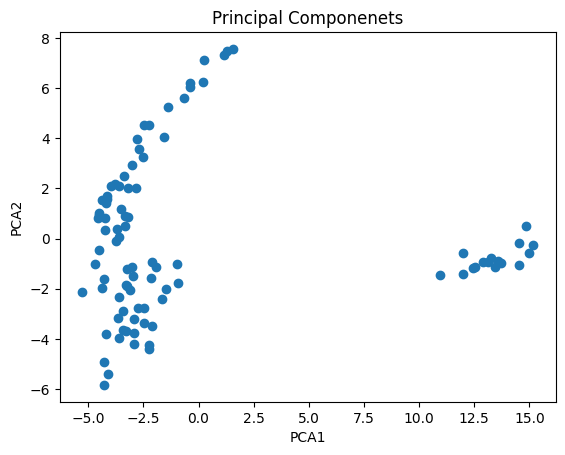

In [276]:
plot_scatter(X_pca)

In [277]:
kmeans = KMeans(n_clusters = 5, random_state = 42)
kmeans.fit(X_pca)

KMeans(n_clusters=5, random_state=42)

In [278]:
pip install mplcursors

In [279]:
import plotly.express as px
import mplcursors

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

X_pca_name = pd.DataFrame({'PCA1': X_pca[:, 0], 'PCA2': X_pca[:, 1], 'labels': labels, 'Full Name': y})
fig = px.scatter(X_pca_name, x='PCA1', y='PCA2', color='labels', hover_data=['Full Name'])
fig.update_traces(marker=dict(size=10))
fig.add_scatter(x=centroids[:, 0], y=centroids[:, 1], mode='markers', marker=dict(symbol='cross', size=10, color='darkred'))
fig.show()

In [280]:
X_pca_name

,PCA1,PCA2,labels,Full Name
0,-4.302721,-5.838089,4,Lionel Messi
1,-3.404468,-3.642608,4,Karim Benzema
2,-3.445533,-2.892311,4,Robert Lewandowski
3,-5.267533,-2.113332,2,Kevin De Bruyne
4,-4.307196,-4.929756,4,Kylian Mbappé
...,...,...,...,...
86,-3.209178,1.997641,1,Theo Hernández
87,-3.262290,-1.201405,2,Diogo José Teixeira da Silva
88,14.866408,0.489203,0,Péter Gulácsi
89,13.719437,-0.983706,0,Yann Sommer


In [281]:
Messi_PCA1 = X_pca_name[X_pca_name["Full Name"] == "Lionel Messi"]["PCA1"].values[0]
Mbappe_PCA1 = X_pca_name[X_pca_name["Full Name"] == "Kylian Mbappé"]["PCA1"].values[0]
Messi_PCA2 = X_pca_name[X_pca_name["Full Name"] == "Lionel Messi"]["PCA2"].values[0]
Mbappe_PCA2 = X_pca_name[X_pca_name["Full Name"] == "Kylian Mbappé"]["PCA2"].values[0]
result_MM = np.sqrt((Messi_PCA1 - Mbappe_PCA1)**2 + (Messi_PCA2 - Mbappe_PCA2)**2)
print("The distance from Messi to Mbappé: ", result_MM)

The distance from Messi to Mbappé:  0.9083443648389563


In [282]:
Mbappe_PCA1 = X_pca_name[X_pca_name["Full Name"] == "Kylian Mbappé"]["PCA1"].values[0]
Ronaldo_PCA1 = X_pca_name[X_pca_name["Full Name"] == "C. Ronaldo dos Santos Aveiro"]["PCA1"].values[0]
Mbappe_PCA2 = X_pca_name[X_pca_name["Full Name"] == "Kylian Mbappé"]["PCA2"].values[0]
Ronaldo_PCA2 = X_pca_name[X_pca_name["Full Name"] == "C. Ronaldo dos Santos Aveiro"]["PCA2"].values[0]
result_MR = np.sqrt((Mbappe_PCA1 - Ronaldo_PCA1)**2 + (Mbappe_PCA2 - Ronaldo_PCA2)**2)
print("The distance from Mbappé to Ronaldo: ", result_MR)

The distance from Mbappé to Ronaldo:  1.8170226988277582


In [283]:
closest_distance = min(result_MM, result_MR)
if closest_distance == result_MM:
  print("Mbappé style is more comparable to Messi!")
else:
  print("Mbappé style is more comparable to Ronaldo!")

Mbappé style is more comparable to Messi!


In [388]:
df

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15


In [389]:
Taremi = df[df["Full Name"] == "Mehdi Taremi"]
Taremi

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
296,M. Taremi,Mehdi Taremi,81,81,25500000,"ST,CF",ST,Iran,https://cdn.sofifa.net/players/241/788/23_60.png,29,...,81,76,81,62,60,62,59,53,59,20


In [286]:
Taremi = Taremi.drop(["Known As", "Positions Played", "Best Position", "Nationality", "Image Link", "Club Name", "Club Position", "Contract Until", "Club Jersey Number", "On Loan", "Preferred Foot", "National Team Name", "National Team Image Link", "National Team Position", "National Team Jersey Number", "Attacking Work Rate", "Defensive Work Rate"], axis=1)

In [287]:
Taremi_X = Taremi.drop(labels=['Full Name'], axis=1)
Taremi_y = Taremi.loc[:,'Full Name']
Taremi_X

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
296,81,81,25500000,29,186,83,1959,422,22000,51000000,...,81,76,81,62,60,62,59,53,59,20


In [288]:
Taremi_scaled = scaler.transform(Taremi_X)
Taremi_scaled

array([[-3.24947676, -2.86129643, -1.40270566, -0.01747408,  0.42774345,
         0.59560713, -0.15273958, -1.6616103 , -1.82335891, -1.23970444,
         0.70395857,  0.63754472,  0.75996169, -2.96684909, -0.11554457,
         0.27105243, -0.7634708 , -0.35092562, -1.21966744, -0.64389241,
         0.23520878,  0.71615039,  0.522031  ,  0.13609608,  0.57307308,
         0.40502763,  0.32560077, -0.55567138, -0.35365122,  0.4672787 ,
         0.41581139,  0.30655605,  0.01525363, -1.06334028, -0.31587538,
         0.3771338 ,  0.17491426,  0.49016912,  0.4036986 ,  0.26655918,
        -1.01393861, -1.3090416 ,  0.65314443,  0.22512721,  0.65327033,
         0.19968786, -0.65635178, -0.49862925, -0.94410947, -0.49672406,
        -0.43873068, -0.51636784, -0.30602282, -0.53095909,  0.44957955,
         0.44963612,  0.47986042,  0.47986042,  0.47986042,  0.44963612,
         0.30815776,  0.33394654,  0.04877462,  0.33394654, -0.40328929,
        -0.59494864, -0.40328929, -0.4766545 , -0.6

In [289]:
Taremi_pca = pca.transform(Taremi_scaled)
Taremi_pca

array([[-0.88197553, -1.24368558]])

In [290]:
Taremi_PCA1 = Taremi_pca[0][0]
Ronaldo_PCA1 = X_pca_name[X_pca_name["Full Name"] == "C. Ronaldo dos Santos Aveiro"]["PCA1"].values[0]
Taremi_PCA2 = Taremi_pca[0][1]
Ronaldo_PCA2 = X_pca_name[X_pca_name["Full Name"] == "C. Ronaldo dos Santos Aveiro"]["PCA2"].values[0]
result_TR = np.sqrt((Taremi_PCA1 - Ronaldo_PCA1)**2 + (Taremi_PCA2 - Ronaldo_PCA2)**2)
print("The distance from Taremi to Ronaldo: ", result_TR)

The distance from Taremi to Ronaldo:  3.236219607588348


In [291]:
Messi_PCA1 = X_pca_name[X_pca_name["Full Name"] == "Lionel Messi"]["PCA1"].values[0]
Taremi_PCA1 = Taremi_pca[0][0]
Messi_PCA2 = X_pca_name[X_pca_name["Full Name"] == "Lionel Messi"]["PCA2"].values[0]
Taremi_PCA2 = Taremi_pca[0][1]
result_TM = np.sqrt((Messi_PCA1 - Taremi_PCA1)**2 + (Messi_PCA2 - Taremi_PCA2)**2)
print("The distance from Messi to Taremi: ", result_TM)

The distance from Messi to Taremi:  5.728005273044289


In [292]:
closest_distance = min(result_TR, result_TM)
if closest_distance == result_TM:
  print("Taremi style is more comparable to Messi!")
else:
  print("Taremi style is more comparable to Ronaldo!")

Taremi style is more comparable to Ronaldo!


In [390]:
all_df = df.drop(["Known As", "Positions Played", "Best Position", "Nationality", "Image Link", "Club Name", "Club Position", "Contract Until", "Club Jersey Number", "On Loan", "Preferred Foot", "National Team Name", "National Team Image Link", "National Team Position", "National Team Jersey Number", "Attacking Work Rate", "Defensive Work Rate"], axis=1)

In [391]:
all_X = all_df.drop(labels=['Full Name'], axis=1)
all_y = all_df.loc[:,'Full Name']

In [392]:
scaler = StandardScaler()
all_X_scaled = scaler.fit_transform(all_X)

In [393]:
pca = PCA(n_components = 2)
all_X_pca = pca.fit_transform(all_X_scaled)
all_X_pca

array([[-13.89401497,  10.06631013],
       [-13.84227087,   8.60888127],
       [-14.08906784,   8.27850127],
       ...,
       [  3.58343179,   0.55755296],
       [  8.74108978,  -4.47799932],
       [  6.06655513,  -2.55303698]])

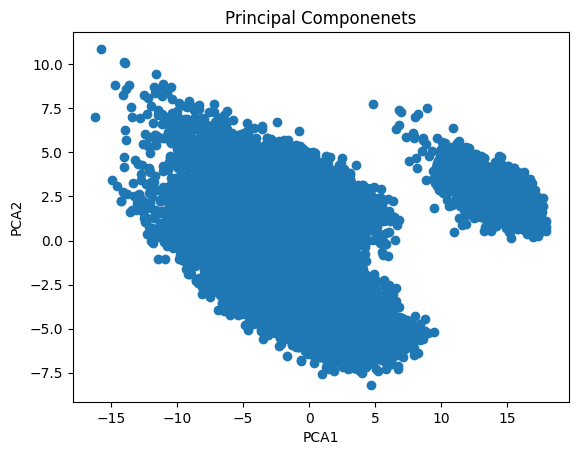

In [394]:
plot_scatter(all_X_pca)

In [395]:
kmeans = KMeans(n_clusters = 16, random_state = 42)
kmeans.fit(all_X_pca)

KMeans(n_clusters=16, random_state=42)

In [396]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

all_X_pca_name = pd.DataFrame({'PCA1': all_X_pca[:, 0], 'PCA2': all_X_pca[:, 1], 'labels': labels, 'Full Name': all_y})
fig = px.scatter(all_X_pca_name, x='PCA1', y='PCA2', color='labels', hover_data=['Full Name'])
fig.update_traces(marker=dict(size=10))
fig.add_scatter(x=centroids[:, 0], y=centroids[:, 1], mode='markers', marker=dict(symbol='cross', size=10, color='darkred'))
fig.show()

In [397]:
position_unique = df["Best Position"].unique()

array(['CAM', 'CF', 'ST', 'CM', 'RW', 'GK', 'CB', 'LW', 'CDM', 'LM', 'LB',
       'RM', 'RB', 'LWB', 'RWB'], dtype=object)

In [398]:
df["Best Position"].nunique()

15

In [399]:
df

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,Darren Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,https://cdn.sofifa.net/players/243/725/23_60.png,21,...,50,44,50,41,38,41,40,36,40,15
18535,Yang Dejiang,Dejiang Yang,47,57,90000,CDM,CDM,China PR,https://cdn.sofifa.net/players/261/933/23_60.png,17,...,45,45,45,47,48,47,49,49,49,15
18536,L. Mullan,Liam Mullan,47,67,130000,CM,RM,Northern Ireland,https://cdn.sofifa.net/players/267/823/23_60.png,18,...,52,49,52,46,44,46,46,42,46,17
18537,D. McCallion,Daithí McCallion,47,61,100000,CB,CB,Republic of Ireland,https://cdn.sofifa.net/players/267/824/23_60.png,17,...,33,33,33,44,42,44,47,49,47,15


In [400]:
check = df[['Full Name', 'Best Position']]
check['Cluster'] = kmeans.labels_
check

,Full Name,Best Position,Cluster
0,Lionel Messi,CAM,15
1,Karim Benzema,CF,15
2,Robert Lewandowski,ST,15
3,Kevin De Bruyne,CM,15
4,Kylian Mbappé,ST,15
...,...,...,...
18534,Darren Collins,CAM,5
18535,Dejiang Yang,CDM,4
18536,Liam Mullan,RM,5
18537,Daithí McCallion,CB,6


In [401]:
M = {
    0: 'LWB',
    1: 'RWB',
    2: 'LB',
    3: 'LM',
    4: 'RM',
    5: 'RB',
    6: 'CDM',
    7: 'LW',
    8: 'CAM',
    9: 'ST',
    10: 'GK',
    11: 'CM',
    12: 'CB',
    13: 'CF',
    14: 'LB',
    15: 'RW'
}

In [402]:
check['Cluster'] = check['Cluster'].map(M)
check

,Full Name,Best Position,Cluster
0,Lionel Messi,CAM,RWB
1,Karim Benzema,CF,RWB
2,Robert Lewandowski,ST,RWB
3,Kevin De Bruyne,CM,RWB
4,Kylian Mbappé,ST,RWB
...,...,...,...
18534,Darren Collins,CAM,RB
18535,Dejiang Yang,CDM,RM
18536,Liam Mullan,RM,RB
18537,Daithí McCallion,CB,CDM


In [408]:
positions = df['Best Position'].unique()
best_position = set(positions)
best_position

{'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'GK',
 'LB',
 'LM',
 'LW',
 'LWB',
 'RB',
 'RM',
 'RW',
 'RWB',
 'ST'}

In [410]:
for i in best_position:
  print(f'Cluster {i} accuracy: {check[check["Best Position"] == i]["Cluster"].value_counts().max()/ check[check["Best Position"] == i].shape[0]}')

Cluster CAM accuracy: 0.21029857204673302
Cluster CM accuracy: 0.2726449275362319
Cluster LWB accuracy: 0.26485148514851486
Cluster RM accuracy: 0.1878031878031878
Cluster CB accuracy: 0.42591580098414433
Cluster LM accuracy: 0.1944792973651192
Cluster GK accuracy: 0.5245026686074721
Cluster LB accuracy: 0.23726851851851852
Cluster CF accuracy: 0.3142857142857143
Cluster RWB accuracy: 0.2843601895734597
Cluster RB accuracy: 0.2702702702702703
Cluster ST accuracy: 0.30955165692007797
Cluster RW accuracy: 0.3602693602693603
Cluster CDM accuracy: 0.34568781183178904
Cluster LW accuracy: 0.3209302325581395


In [322]:
import struct
import numpy as np
import cv2


def __convert_to_one_hot(vector, num_classes):
    result = np.zeros(shape=[len(vector), num_classes])
    result[np.arange(len(vector)), vector] = 1
    return result


def __resize_image(src_image, dst_image_height, dst_image_width):
    src_image_height = src_image.shape[0]
    src_image_width = src_image.shape[1]

    if src_image_height > dst_image_height or src_image_width > dst_image_width:
        height_scale = dst_image_height / src_image_height
        width_scale = dst_image_width / src_image_width
        scale = min(height_scale, width_scale)
        img = cv2.resize(src=src_image, dsize=(0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    else:
        img = src_image

    img_height = img.shape[0]
    img_width = img.shape[1]

    dst_image = np.zeros(shape=[dst_image_height, dst_image_width], dtype=np.uint8)

    y_offset = (dst_image_height - img_height) // 2
    x_offset = (dst_image_width - img_width) // 2

    dst_image[y_offset:y_offset+img_height, x_offset:x_offset+img_width] = img

    return dst_image


def read_hoda_cdb(file_name):
    with open(file_name, 'rb') as binary_file:

        data = binary_file.read()

        offset = 0

        # read private header

        yy = struct.unpack_from('H', data, offset)[0]
        offset += 2

        m = struct.unpack_from('B', data, offset)[0]
        offset += 1

        d = struct.unpack_from('B', data, offset)[0]
        offset += 1

        H = struct.unpack_from('B', data, offset)[0]
        offset += 1

        W = struct.unpack_from('B', data, offset)[0]
        offset += 1

        TotalRec = struct.unpack_from('I', data, offset)[0]
        offset += 4

        LetterCount = struct.unpack_from('128I', data, offset)
        offset += 128 * 4

        imgType = struct.unpack_from('B', data, offset)[0]  # 0: binary, 1: gray
        offset += 1

        Comments = struct.unpack_from('256c', data, offset)
        offset += 256 * 1

        Reserved = struct.unpack_from('245c', data, offset)
        offset += 245 * 1

        if (W > 0) and (H > 0):
            normal = True
        else:
            normal = False

        images = []
        labels = []

        for i in range(TotalRec):

            StartByte = struct.unpack_from('B', data, offset)[0]  # must be 0xff
            offset += 1

            label = struct.unpack_from('B', data, offset)[0]
            offset += 1

            if not normal:
                W = struct.unpack_from('B', data, offset)[0]
                offset += 1

                H = struct.unpack_from('B', data, offset)[0]
                offset += 1

            ByteCount = struct.unpack_from('H', data, offset)[0]
            offset += 2

            image = np.zeros(shape=[H, W], dtype=np.uint8)

            if imgType == 0:
                # Binary
                for y in range(H):
                    bWhite = True
                    counter = 0
                    while counter < W:
                        WBcount = struct.unpack_from('B', data, offset)[0]
                        offset += 1
                        # x = 0
                        # while x < WBcount:
                        #     if bWhite:
                        #         image[y, x + counter] = 0  # Background
                        #     else:
                        #         image[y, x + counter] = 255  # ForeGround
                        #     x += 1
                        if bWhite:
                            image[y, counter:counter + WBcount] = 0  # Background
                        else:
                            image[y, counter:counter + WBcount] = 255  # ForeGround
                        bWhite = not bWhite  # black white black white ...
                        counter += WBcount
            else:
                # GrayScale mode
                data = struct.unpack_from('{}B'.format(W * H), data, offset)
                offset += W * H
                image = np.asarray(data, dtype=np.uint8).reshape([W, H]).T

            images.append(image)
            labels.append(label)

        return images, labels


def read_hoda_dataset(dataset_path, images_height=32, images_width=32, one_hot=False, reshape=True):
    images, labels = read_hoda_cdb(dataset_path)
    assert len(images) == len(labels)

    X = np.zeros(shape=[len(images), images_height, images_width], dtype=np.float32)
    Y = np.zeros(shape=[len(labels)], dtype=np.int)

    for i in range(len(images)):
        image = images[i]
        # Image resizing.
        image = __resize_image(src_image=image, dst_image_height=images_height, dst_image_width=images_width)
        # Image normalization.
        image = image / 255
        # Image binarization.
        image = np.where(image >= 0.5, 1, 0)
        # Image.
        X[i] = image
        # Label.
        Y[i] = labels[i]

    if one_hot:
        Y = __convert_to_one_hot(Y, 10).astype(dtype=np.float32)
    else:
        Y = Y.astype(dtype=np.float32)

    if reshape:
        X = X.reshape(-1, images_height * images_width)
    else:
        X = X.reshape(-1, images_height, images_width, 1)

    return X, Y

In [313]:
!gdown 1--5B_cHdkoAaC7knovcZkA1IvSo0srih

Downloading...
From: https://drive.google.com/uc?id=1--5B_cHdkoAaC7knovcZkA1IvSo0srih
To: /content/Train 60000.cdb
100% 6.50M/6.50M [00:00<00:00, 49.1MB/s]


In [328]:
dataset_path = "Train 60000.cdb"
X_train, y_train = read_hoda_dataset(dataset_path, images_height=32, images_width=32, one_hot=False, reshape=True)
df_train = pd.DataFrame(data=np.c_[X_train, y_train], columns=[f'feature_{i}' for i in range(X_train.shape[1])] + ['class'])

In [329]:
df_train

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_1015,feature_1016,feature_1017,feature_1018,feature_1019,feature_1020,feature_1021,feature_1022,feature_1023,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


In [325]:
!gdown 1-1ijMS_hOWRrRjohzqYSdK7ZjabWduDT

Downloading...
From: https://drive.google.com/uc?id=1-1ijMS_hOWRrRjohzqYSdK7ZjabWduDT
To: /content/Test 20000.cdb
100% 2.18M/2.18M [00:00<00:00, 185MB/s]


In [330]:
dataset_path = "Test 20000.cdb"
X_test, y_test = read_hoda_dataset(dataset_path, images_height=32, images_width=32, one_hot=False, reshape=True)
df_test = pd.DataFrame(data=np.c_[X_test, y_test], columns=[f'feature_{i}' for i in range(X_test.shape[1])] + ['class'])

In [331]:
df_test

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_1015,feature_1016,feature_1017,feature_1018,feature_1019,feature_1020,feature_1021,feature_1022,feature_1023,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
19996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
19997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
19998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0


In [352]:
from numpy.linalg import norm
from scipy.spatial.distance import cdist

class MDC():
  def __init__(self):
      self.Clist = {}
      self.means = {}

  def fit(self, X, y):
      self.Clist = np.unique(y, axis=0)

      self.means = np.zeros((len(self.Clist), X.shape[1]))

      for i in range(len(self.Clist)):
          temp = np.where(y==self.Clist[i])[0]
          self.means[i,:] = np.mean(X[temp],axis=0)

  def predict(self, X):
      current_min = np.argmin(
          cdist(X, self.means),
          axis=1)
      y_pred = np.array([self.Clist[i] for i in current_min])
      return y_pred

In [353]:
mdc = MDC()
mdc.fit(X_train, y_train)

In [354]:
mdc.Clist

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)

In [355]:
mdc.means

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00016667, ..., 0.00016667, 0.        ,
        0.        ],
       [0.        , 0.        , 0.00016667, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00066667, 0.00233333, 0.00733333, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.0205    , 0.007     ,
        0.0015    ],
       [0.        , 0.        , 0.        , ..., 0.01      , 0.00383333,
        0.00066667]])

In [356]:
prototype = pd.DataFrame(mdc.means)

In [357]:
prototype

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000167,0.000167,0.000333,0.000833,0.002500,0.006500,0.013667,0.023833,...,0.019000,0.010667,0.003333,0.002167,0.000500,0.000167,0.000000,0.000167,0.000000,0.000000
2,0.000000,0.000000,0.000167,0.000333,0.000667,0.002500,0.008333,0.022167,0.045333,0.063833,...,0.035667,0.024000,0.011667,0.004667,0.002500,0.001000,0.000167,0.000000,0.000000,0.000000
3,0.000000,0.000667,0.002500,0.006667,0.014333,0.021500,0.027333,0.020500,0.012667,0.005333,...,0.010500,0.008167,0.005000,0.002833,0.001167,0.000667,0.000500,0.000500,0.000167,0.000000
4,0.000000,0.000333,0.000500,0.002167,0.002667,0.004500,0.004667,0.006333,0.006833,0.008500,...,0.036833,0.030167,0.019833,0.014667,0.007833,0.005167,0.003000,0.001500,0.000667,0.000333
5,0.000667,0.000667,0.002000,0.004167,0.005500,0.006833,0.010500,0.014167,0.019500,0.026000,...,0.034833,0.030333,0.021667,0.016000,0.008000,0.004500,0.002167,0.000333,0.000000,0.000000
6,0.000833,0.002333,0.005500,0.008667,0.011167,0.015167,0.023167,0.038167,0.059333,0.105000,...,0.008000,0.009000,0.010833,0.012667,0.011667,0.009167,0.007333,0.006167,0.002500,0.000667
7,0.000667,0.002333,0.007333,0.013333,0.016500,0.016000,0.014333,0.009833,0.004833,0.002833,...,0.002333,0.002000,0.001167,0.000667,0.000167,0.000167,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000167,0.000333,0.000667,0.001667,0.006000,0.011167,0.018667,...,0.006667,0.016500,0.034667,0.056667,0.064333,0.060333,0.040000,0.020500,0.007000,0.001500
9,0.000000,0.000000,0.000000,0.000667,0.002000,0.004333,0.009500,0.016667,0.027500,0.045667,...,0.196000,0.215500,0.188333,0.144000,0.093833,0.048667,0.022333,0.010000,0.003833,0.000667


In [349]:
y_pred = mdc.predict(X_test)

In [340]:
y_pred

array([0., 0., 0., ..., 1., 9., 9.], dtype=float32)

In [339]:
y_test

array([0., 0., 0., ..., 9., 9., 9.], dtype=float32)

In [380]:
accuracy = accuracy_score(y_test, y_pred)

In [381]:
accuracy

0.73695

In [382]:
error_rate = 1 -  accuracy
print(f"Error Rate: {error_rate * 100:.2f}%")

Error Rate: 26.30%


In [364]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1911    3    0    0   44   25    0   13    4    0]
 [  15 1895   71    0    1    0    4    2    0   12]
 [  11  400 1241  137   61    0   58    4    2   86]
 [  16   20  595 1128  178    9   16    7    6   25]
 [  35   50  344  225 1201   36   65    4   14   26]
 [  27   12   10    1   28 1494   21   10  381   16]
 [  14   34  197   22   32   32 1145  105   27  392]
 [  83   11  106    8   20   16  255 1488    2   11]
 [  86   28   26    0   47   94   47    1 1570  101]
 [  12  197   19    2    2    3   38    1   60 1666]]
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      2000
         1.0       0.72      0.95      0.82      2000
         2.0       0.48      0.62      0.54      2000
         3.0       0.74      0.56      0.64      2000
         4.0       0.74      0.60      0.66      2000
         5.0       0.87      0.75      0.81      2000
         6.0       0.69      0.57      0.63      2000
         7.0       0.91      0.74   

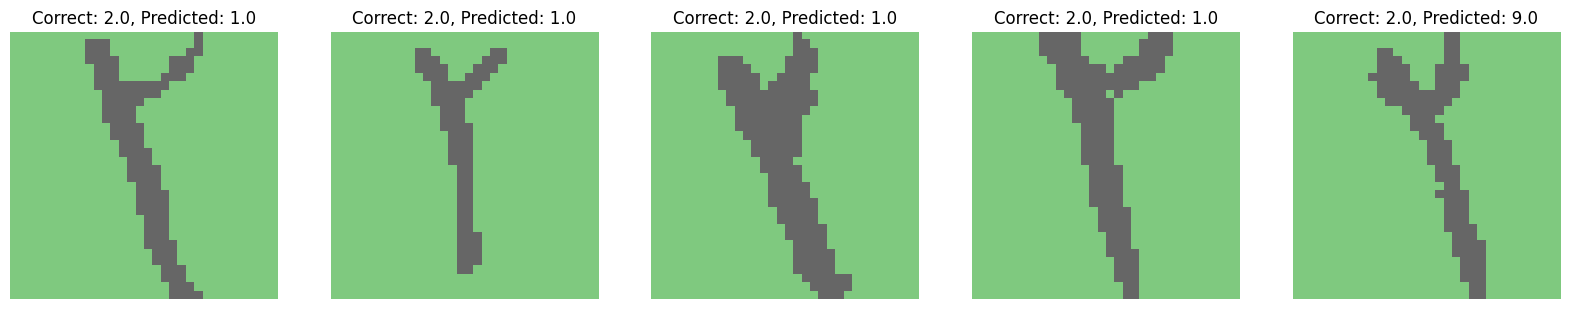

In [370]:
erroneous = np.where(y_pred != y_test)[0][450:455]
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
for i, index in enumerate(erroneous):
  axs[i].imshow(X_test[index].reshape(32, 32), cmap='Accent')
  axs[i].set_title(f'Correct: {y_test[index]}, Predicted: {y_pred[index]}')
  axs[i].axis('off')

plt.show()